# Walmart Review

In [1]:
!pip install --upgrade gdown


  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [2]:
import gdown
!gdown 1lcjtmvtSjco6cnWaJvgJNTGjGJoKieh1

Downloading...
From: https://drive.google.com/uc?id=1lcjtmvtSjco6cnWaJvgJNTGjGJoKieh1
To: /content/walmart-data.csv.txt
100% 23.0M/23.0M [00:00<00:00, 107MB/s] 


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv("walmart-data.csv")
df.head(10)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [8]:
df['Gender'].value_counts(normalize=True) * 100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [9]:
df.groupby("Gender")["User_ID"].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [10]:
df.groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


<Axes: xlabel='Gender', ylabel='Purchase'>

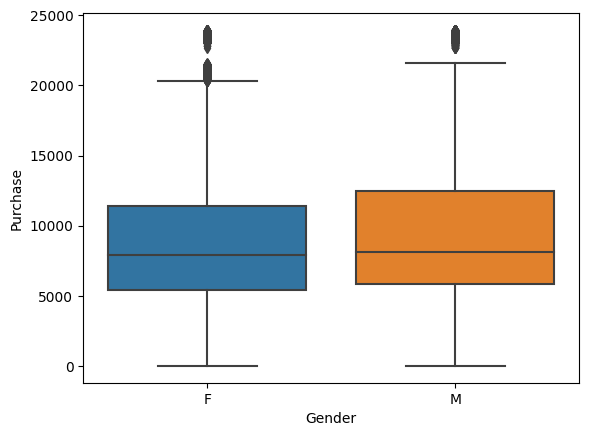

In [11]:
sns.boxplot(x="Gender", y="Purchase", data=df)

## CLT

In [12]:
df.groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [13]:
# start taking a sample of size 500 from the population of 5.5 Lac records

df.sample(500).groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,120.0,8532.675000,5284.913753,118.0,5182.25,7672.5,10408.00,20903.0
M,380.0,9234.213158,4827.554574,189.0,5867.50,8069.5,12030.75,21345.0


In [14]:
df.sample(500).groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,95.0,9212.326316,4967.967056,757.0,5420.5,8084.0,12781.5,23143.0
M,405.0,9606.061728,5139.299564,14.0,5472.0,8602.0,12611.0,23650.0


In [15]:
df.sample(500).groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,120.0,8186.433333,4517.501285,568.0,5343.50,7823.5,9960.25,21158.0
M,380.0,9585.147368,5189.449192,60.0,5434.75,8132.5,13352.75,23472.0


In [16]:
size = 500
iterations = 500

male_sample_means = [df[df["Gender"] == "M"].sample(size, replace=True)["Purchase"].mean() for i in range(iterations)]
male_sample_means

[9489.718,
 9280.112,
 9165.61,
 9347.31,
 9373.652,
 9121.764,
 9410.862,
 9395.044,
 9531.402,
 9129.45,
 9391.006,
 9401.266,
 9268.588,
 9137.632,
 9594.098,
 9558.618,
 9097.648,
 9600.012,
 9435.06,
 9670.896,
 9495.224,
 9281.184,
 9498.644,
 9524.338,
 9404.254,
 9227.116,
 9484.976,
 9560.88,
 9423.8,
 9487.718,
 9479.33,
 9134.712,
 9872.468,
 9291.184,
 9192.37,
 9006.736,
 9900.864,
 9620.234,
 9349.736,
 9717.726,
 9446.782,
 9587.752,
 9208.828,
 9656.178,
 9475.06,
 9542.872,
 9407.75,
 9415.684,
 9153.048,
 9538.676,
 9471.752,
 9435.194,
 9019.24,
 9091.054,
 9331.948,
 9700.282,
 9439.382,
 9242.454,
 9571.08,
 9566.552,
 9870.738,
 9402.378,
 9419.69,
 8815.186,
 9278.716,
 9772.064,
 9290.434,
 9404.776,
 9568.752,
 9204.25,
 9720.966,
 9376.268,
 9490.094,
 9419.884,
 9370.726,
 9332.488,
 9436.186,
 9281.956,
 9224.48,
 8880.814,
 9523.098,
 9595.252,
 9183.312,
 9801.69,
 9541.782,
 9454.042,
 9584.058,
 9500.064,
 9747.604,
 9508.936,
 9858.512,
 9707.134,
 9268

In [18]:
female_sample_means = [df[df["Gender"] == "F"].sample(size, replace=True)["Purchase"].mean() for i in range(iterations)]
female_sample_means

[8656.276,
 8751.606,
 8516.194,
 9104.486,
 8772.17,
 8704.53,
 9316.898,
 9014.906,
 9025.394,
 8622.788,
 9085.082,
 8700.75,
 8873.448,
 8978.522,
 8656.312,
 8870.724,
 8407.906,
 8639.926,
 8784.236,
 8664.072,
 8930.078,
 8753.59,
 8516.036,
 8762.852,
 8869.426,
 8736.1,
 8787.838,
 8534.898,
 8679.228,
 8607.296,
 8688.16,
 8854.582,
 8728.526,
 8620.948,
 8922.936,
 8688.924,
 8875.936,
 8481.94,
 8750.808,
 8898.608,
 8800.488,
 8724.296,
 8905.948,
 8619.328,
 8952.234,
 8543.6,
 8582.218,
 8696.264,
 8813.408,
 8791.904,
 9132.012,
 8656.04,
 8845.552,
 8640.742,
 8615.792,
 8677.804,
 8747.234,
 8692.454,
 8848.268,
 8945.14,
 8805.766,
 8279.054,
 8751.452,
 8961.698,
 8744.832,
 8895.524,
 9075.966,
 8815.602,
 8566.188,
 8783.984,
 8988.37,
 9097.116,
 8882.98,
 8518.126,
 8860.604,
 9088.692,
 8482.752,
 8787.928,
 9069.942,
 8857.17,
 8434.82,
 8502.566,
 8974.764,
 8400.908,
 8847.092,
 8545.168,
 8695.99,
 8873.368,
 8404.508,
 8981.578,
 9176.908,
 8732.122,
 8122

<ipython-input-19-18de4969bb0b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_sample_means)


<Axes: ylabel='Density'>

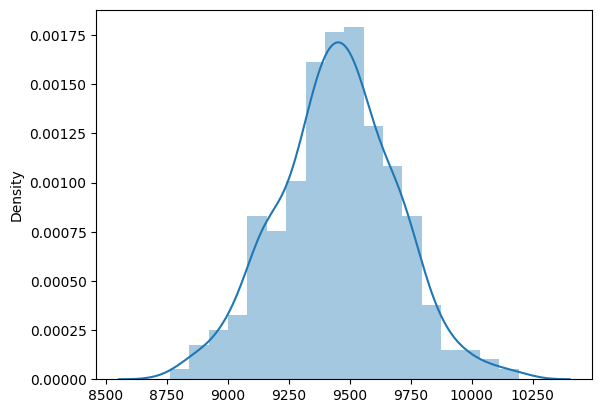

In [19]:
sns.distplot(male_sample_means)

<ipython-input-20-02c14cf8e6a3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(female_sample_means)


<Axes: ylabel='Density'>

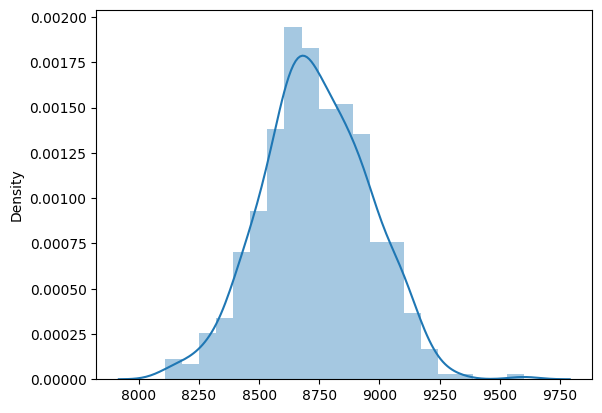

In [20]:
sns.distplot(female_sample_means)

In [21]:
male_confiedence_interval = np.percentile(male_sample_means, [2.5, 97.5])
female_confiedence_interval = np.percentile(female_sample_means, [2.5, 97.5])

In [22]:
male_confiedence_interval

array([8974.5327, 9930.7603])

In [23]:
female_confiedence_interval

array([8299.14735, 9147.5186 ])